# Libraries

In [1]:
import json, requests, os, re
import pandas as pd

from io import StringIO
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.by import By
#from datetime import datetime, timedelta
from tqdm.notebook import tqdm

# Capture Network's Traffic

In [26]:
options = ChromeOptions()
#options.add_argument('--headless')
options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})

In [3]:
def process_browser_log_entry(entry):
    response = json.loads(entry['message'])['message']
    return response

In [27]:
r = requests.get('https://www.tokopedia.com/find/kulkas-2-pintu', headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})

In [28]:
r.text

'<!DOCTYPE html>\n<html lang="id" translate="no">\n  <head>\n    <title data-rh="true">Kulkas 2 Pintu Termurah - Promo &quot;DISKONHL&quot; 50rb!</title>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width">\n    <link rel="preconnect" href="https://assets.tokopedia.net" crossorigin><link rel="dns-prefetch" href="https://assets.tokopedia.net" nonce="/yMSiIyy/pjvdLKDeawp9Q==">\n<link rel="preconnect" href="https://gql.tokopedia.com" crossorigin><link rel="dns-prefetch" href="https://gql.tokopedia.com" nonce="/yMSiIyy/pjvdLKDeawp9Q==">\n<link rel="preconnect" href="https://googleads.g.doubleclick.net" crossorigin><link rel="dns-prefetch" href="https://googleads.g.doubleclick.net" nonce="/yMSiIyy/pjvdLKDeawp9Q==">\n<link rel="preconnect" href="https://www.google-analytics.com" crossorigin><link rel="dns-prefetch" href="https://www.google-analytics.com" nonce="/yMSiIyy/pjvdLKDeawp9Q==">\n<l

In [29]:
pattern = r'window\.__cache={(.*?)};'

In [30]:
matches = re.findall(pattern, r.text, re.DOTALL)

In [31]:
matches = '{' + matches[0] + '}'

In [6]:
#r = requests.get('https://tokopedia.com/find/kulkas-2-pintu')

# Buka Browser

In [6]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

#driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
#driver = webdriver.Chrome()

In [8]:
#driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [13]:
driver.get('https://tokopedia.com/find/kulkas-2-pintu')

In [19]:
driver.get('https://tokopedia.com/find/kulkas-2-pintu?page=2')

In [20]:
body = driver.page_source

'<html dir="ltr" lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="color-scheme" content="light dark">\n  <meta name="theme-color" content="#fff">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0,\n                                 maximum-scale=1.0, user-scalable=no">\n  <title>www.tokopedia.com</title>\n  <style>/* Copyright 2017 The Chromium Authors\n * Use of this source code is governed by a BSD-style license that can be\n * found in the LICENSE file. */\n\na {\n  color: var(--link-color);\n}\n\nbody {\n  --background-color: #fff;\n  --error-code-color: var(--google-gray-700);\n  --google-blue-100: rgb(210, 227, 252);\n  --google-blue-300: rgb(138, 180, 248);\n  --google-blue-600: rgb(26, 115, 232);\n  --google-blue-700: rgb(25, 103, 210);\n  --google-gray-100: rgb(241, 243, 244);\n  --google-gray-300: rgb(218, 220, 224);\n  --google-gray-500: rgb(154, 160, 166);\n  --google-gray-50: rgb(248, 249, 250);\n  --google-gray-600: rgb(128, 134, 139);\n  --g
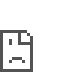
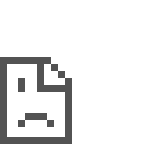
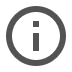
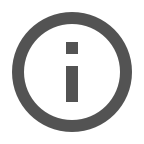
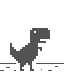
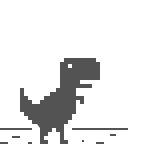
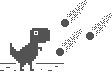
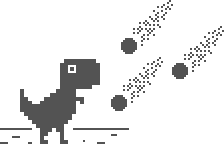
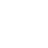
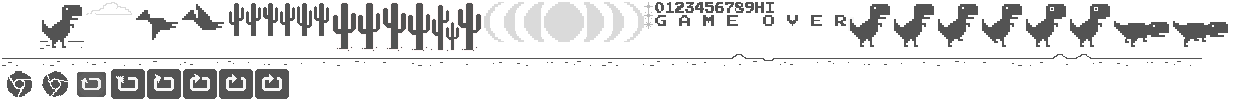
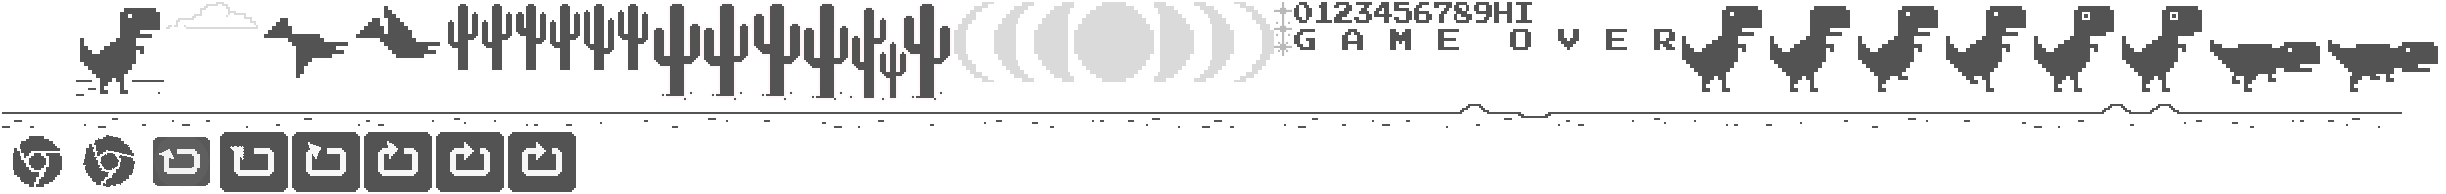

In [21]:
body

In [22]:
pattern = r'window\.__cache={(.*?)};'

In [23]:
matches = re.findall(pattern, body, re.DOTALL)

In [24]:
matches = '{' + matches[0] + '}'

IndexError: list index out of range

In [32]:
m = json.loads(matches)

In [33]:
m['ROOT_QUERY']

{'isAuthenticatedV2': '',
 'RolloutFeatureVariants({"client_id":4,"iris_session_id":"","rev":0})': {'type': 'id',
  'generated': True,
  'id': '$ROOT_QUERY.RolloutFeatureVariants({"client_id":4,"iris_session_id":"","rev":0})',
  'typename': 'RolloutFeatureVariantsResponse'},
 'trending_keywords': {'type': 'id',
  'generated': True,
  'id': '$ROOT_QUERY.trending_keywords',
  'typename': 'TrendingKeywords'},
 'findInfo({"params":"alias=kulkas-2-pintu"})': {'type': 'id',
  'generated': True,
  'id': '$ROOT_QUERY.findInfo({"params":"alias=kulkas-2-pintu"})',
  'typename': 'FindInfoData'},
 'RolloutFeatureVariants({"client_id":4,"id":"68773279d3df037454d15e5627b3ffd5","iris_session_id":"","rev":0})': {'type': 'id',
  'generated': True,
  'id': '$ROOT_QUERY.RolloutFeatureVariants({"client_id":4,"id":"68773279d3df037454d15e5627b3ffd5","iris_session_id":"","rev":0})',
  'typename': 'RolloutFeatureVariantsResponse'},
 'filter_sort_product({"params":"q=kulkas+2+pintu&source=search_product"})': {

In [34]:
rollout_ = ''
iris_ = ''
params_ = ''
adparams_ = ''
for key, value in m['ROOT_QUERY'].items():
    if 'RolloutFeature' in key:
        rollout_ = key
        iris_ = rollout_.split('iris_session_id":"')[1].split('","')[0]
        #print
    if'searchProductV5' in key:
        params_ = key.replace('searchProductV5({"params":"', '').replace('"})', '')

    if 'displayAdsV3' in key:
        adparams_ = key.replace('displayAdsV3({"displayParams":"', '').replace('"})', '')
        #print(value)
    #print(key)

In [36]:
iris_

''

In [37]:
rollout_

'RolloutFeatureVariants({"client_id":4,"id":"68773279d3df037454d15e5627b3ffd5","iris_session_id":"","rev":0})'

In [38]:
params_

'device=desktop&fcity=&l_name=sre&ob=23&page=1&q=kulkas%202%20pintu&related=true&rows=60&safe_search=false&scheme=https&source=search&st=product&start=0&unique_id=68773279d3df037454d15e5627b3ffd5&user_addressId=&user_cityId=176&user_districtId=2274&user_lat=&user_long=&user_postCode='

In [39]:
adparams_

'device=desktop&ep=product&fcity=&item=20&l_name=sre&minimum_item=10&ob=23&page=1&q=kulkas%202%20pintu&src=find&st=product'

# Use requests

In [40]:
S = requests.Session()

In [23]:
for cookie in driver.get_cookies():
    S.cookies.set(cookie['name'], cookie['value'])

In [41]:
data_pre = [{"operationName":"SearchProductQueryV5","query":"query SearchProductQueryV5($params: String!, $adParams: String!) {\n  organic: searchProductV5(params: $params) {\n    header {\n      totalData\n      responseCode\n      keywordProcess\n      keywordIntention\n      componentID\n      isQuerySafe\n      additionalParams\n      backendFilters\n      __typename\n    }\n    data {\n      totalDataText\n      related {\n        relatedKeyword\n        position\n        trackingOption\n        otherRelated {\n          keyword\n          url\n          componentID\n          products {\n            id\n            name\n            url\n            applink\n            mediaURL {\n              image\n              __typename\n            }\n            shop {\n              id\n              name\n              city\n              tier\n              __typename\n            }\n            badge {\n              id\n              title\n              url\n              __typename\n            }\n            price {\n              text\n              number\n              __typename\n            }\n            freeShipping {\n              url\n              __typename\n            }\n            labelGroups {\n              position\n              title\n              type\n              url\n              styles {\n                key\n                value\n                __typename\n              }\n              __typename\n            }\n            rating\n            wishlist\n            ads {\n              id\n              productClickURL\n              productViewURL\n              productWishlistURL\n              tag\n              __typename\n            }\n            meta {\n              warehouseID\n              componentID\n              __typename\n            }\n            __typename\n          }\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        query\n        text\n        componentID\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        url\n        applink\n        mediaURL {\n          image\n          image300\n          videoCustom\n          __typename\n        }\n        shop {\n          id\n          name\n          url\n          city\n          tier\n          __typename\n        }\n        badge {\n          id\n          title\n          url\n          __typename\n        }\n        price {\n          text\n          number\n          range\n          original\n          discountPercentage\n          __typename\n        }\n        freeShipping {\n          url\n          __typename\n        }\n        labelGroups {\n          position\n          title\n          type\n          url\n          styles {\n            key\n            value\n            __typename\n          }\n          __typename\n        }\n        category {\n          id\n          name\n          breadcrumb\n          gaKey\n          __typename\n        }\n        rating\n        wishlist\n        ads {\n          id\n          productClickURL\n          productViewURL\n          productWishlistURL\n          tag\n          __typename\n        }\n        meta {\n          countReview\n          parentID\n          warehouseID\n          isImageBlurred\n          isPortrait\n          __typename\n        }\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n  topads: displayAdsV3(displayParams: $adParams) {\n    data {\n      id\n      productClickURL: product_click_url\n      product {\n        id\n        name\n        wishlist\n        image {\n          imageURL: s_ecs\n          viewTrackURL: s_url\n          __typename\n        }\n        url: uri\n        price: price_format\n        rating: product_rating\n        ratingAverage: product_rating_format\n        countReview: count_review_format\n        labelGroups: label_group {\n          position\n          title\n          type\n          url\n          style {\n            key\n            value\n            __typename\n          }\n          __typename\n        }\n        campaign {\n          discountPercentage: discount_percentage\n          originalPrice: original_price\n          __typename\n        }\n        category_breadcrumb\n        __typename\n      }\n      shop {\n        id\n        name\n        uri\n        location\n        goldmerchant: gold_shop\n        official: shop_is_official\n        badges {\n          title\n          imageURL: image_url\n          show\n          __typename\n        }\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"}]

In [42]:
data_pre

[{'operationName': 'SearchProductQueryV5',
  'query': 'query SearchProductQueryV5($params: String!, $adParams: String!) {\n  organic: searchProductV5(params: $params) {\n    header {\n      totalData\n      responseCode\n      keywordProcess\n      keywordIntention\n      componentID\n      isQuerySafe\n      additionalParams\n      backendFilters\n      __typename\n    }\n    data {\n      totalDataText\n      related {\n        relatedKeyword\n        position\n        trackingOption\n        otherRelated {\n          keyword\n          url\n          componentID\n          products {\n            id\n            name\n            url\n            applink\n            mediaURL {\n              image\n              __typename\n            }\n            shop {\n              id\n              name\n              city\n              tier\n              __typename\n            }\n            badge {\n              id\n              title\n              url\n              __typename\n   

In [43]:
data = data_pre.copy()
data[0]['variables'] = {"params":params_,"adParams":adparams_}

In [44]:
data

[{'operationName': 'SearchProductQueryV5',
  'query': 'query SearchProductQueryV5($params: String!, $adParams: String!) {\n  organic: searchProductV5(params: $params) {\n    header {\n      totalData\n      responseCode\n      keywordProcess\n      keywordIntention\n      componentID\n      isQuerySafe\n      additionalParams\n      backendFilters\n      __typename\n    }\n    data {\n      totalDataText\n      related {\n        relatedKeyword\n        position\n        trackingOption\n        otherRelated {\n          keyword\n          url\n          componentID\n          products {\n            id\n            name\n            url\n            applink\n            mediaURL {\n              image\n              __typename\n            }\n            shop {\n              id\n              name\n              city\n              tier\n              __typename\n            }\n            badge {\n              id\n              title\n              url\n              __typename\n   

In [45]:
headers = {
    'Accept': '*/*',
    'Accept-Language': 'en-US,en;q=0.5',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:130.0) Gecko/20100101 Firefox/130.0',
    'content-type': 'application/json',
    'Tkpd-UserId': '0',
    'x-device': 'desktop-0.0',
    'x-dark-mode': 'false',
    'X-Source': 'tokopedia-lite',
    'X-Version': 'ed69c5d',
    'X-Tkpd-Lite-Service': 'zeus',
    'iris-session_id': iris_,
    'Priority': 'u=4',
    'Pragma': 'no-cache',
    'Cache-Control': 'no-cache',
}

In [46]:
r = S.get('https://tokopedia.com/find/kulkas-2-pintu', headers=headers)

In [47]:
r.text

'<!DOCTYPE html>\n<html lang="id" translate="no">\n  <head>\n    <title data-rh="true">Kulkas 2 Pintu Termurah - Promo &quot;DISKONHL&quot; 50rb!</title>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width">\n    <link rel="preconnect" href="https://assets.tokopedia.net" crossorigin><link rel="dns-prefetch" href="https://assets.tokopedia.net" nonce="JnwK7d1qPCpROyTG06KIOw==">\n<link rel="preconnect" href="https://gql.tokopedia.com" crossorigin><link rel="dns-prefetch" href="https://gql.tokopedia.com" nonce="JnwK7d1qPCpROyTG06KIOw==">\n<link rel="preconnect" href="https://googleads.g.doubleclick.net" crossorigin><link rel="dns-prefetch" href="https://googleads.g.doubleclick.net" nonce="JnwK7d1qPCpROyTG06KIOw==">\n<link rel="preconnect" href="https://www.google-analytics.com" crossorigin><link rel="dns-prefetch" href="https://www.google-analytics.com" nonce="JnwK7d1qPCpROyTG06KIOw==">\n<l

In [48]:
r = S.post('https://gql.tokopedia.com/graphql/SearchProductQueryV5', headers=headers, json=data)

In [49]:
total_data = r.json()[0]['data']['organic']['header']['totalData']

In [50]:
products = r.json()[0]['data']['organic']['data']['products']

In [51]:
len(products)

60

In [52]:
total_data

463644

In [45]:
#r.json()[0]['data']['organic']

# Try to get page 51

In [54]:
data = data_pre.copy()
data[0]['variables'] = {"params":params_.replace('page=2', 'page=60').replace('start=60', 'start=3540'),"adParams":adparams_.replace('page=2', 'page=60')}

In [55]:
data

[{'operationName': 'SearchProductQueryV5',
  'query': 'query SearchProductQueryV5($params: String!, $adParams: String!) {\n  organic: searchProductV5(params: $params) {\n    header {\n      totalData\n      responseCode\n      keywordProcess\n      keywordIntention\n      componentID\n      isQuerySafe\n      additionalParams\n      backendFilters\n      __typename\n    }\n    data {\n      totalDataText\n      related {\n        relatedKeyword\n        position\n        trackingOption\n        otherRelated {\n          keyword\n          url\n          componentID\n          products {\n            id\n            name\n            url\n            applink\n            mediaURL {\n              image\n              __typename\n            }\n            shop {\n              id\n              name\n              city\n              tier\n              __typename\n            }\n            badge {\n              id\n              title\n              url\n              __typename\n   

In [56]:
r = S.post('https://gql.tokopedia.com/graphql/SearchProductQueryV5', headers=headers, json=data)

In [57]:
r.json()[0]['data']['organic']['data']['products']

[{'id': 7831740717,
  'name': 'CHANGHONG KULKAS 2 PINTU FTM155DB [122L]',
  'url': 'https://www.tokopedia.com/changhong-1/changhong-kulkas-2-pintu-ftm155db-122l?extParam=cmp%3D1%26ivf%3Dfalse%26keyword%3Dkulkas+2+pintu%26search_id%3D20240911034739EE6EB5C138C0CC3E5VM0%26src%3Dsearch',
  'applink': 'tokopedia://product/7831740717?extParam=cmp%3D1%26ivf%3Dfalse%26keyword%3Dkulkas+2+pintu%26search_id%3D20240911034739EE6EB5C138C0CC3E5VM0%26src%3Dsearch',
  'mediaURL': {'image': 'https://images.tokopedia.net/img/cache/200-square/VqbcmM/2024/7/12/35db1b94-110f-4e1f-8c20-90803c5e3cc1.jpg',
   'image300': 'https://images.tokopedia.net/img/cache/300-square/VqbcmM/2024/7/12/35db1b94-110f-4e1f-8c20-90803c5e3cc1.jpg',
   'videoCustom': '',
   '__typename': 'SearchProductV5MediaURL'},
  'shop': {'id': 7223586,
   'name': 'Changhong Home Appliance',
   'url': 'https://www.tokopedia.com/changhong-1',
   'city': 'Kab. Tangerang',
   'tier': 2,
   '__typename': 'SearchProductV5Shop'},
  'badge': {'id': 

# Close the browser

In [25]:
driver.quit()

In [81]:
m['ROOT_QUERY']['isAuthenticatedV2']

''

In [78]:
params_ = matches.split('searchProductV5({')

In [79]:
params_[-1]

'\\"params\\":\\"device=desktop&fcity=&l_name=sre&ob=23&page=2&q=kulkas%202%20pintu&related=true&rows=60&safe_search=false&scheme=https&source=search&st=product&start=60&unique_id=2a46ed189faea6de7c287f2ce539372f&user_addressId=&user_cityId=176&user_districtId=2274&user_lat=&user_long=&user_postCode=\\"}).data.suggestion":{"currentKeyword":"kulkas 2 pintu","suggestion":"","query":"","text":"","componentID":"","trackingOption":0,"__typename":"SearchProductV5Suggestion"},"searchProductV5Product7742750713":{"id":7742750713,"name":"Kulkas 2 Pintu 172 Liter Sharp SJ 195MNHS Kirei Series Garansi Resmi","url":"https://www.tokopedia.com/118-cellular/kulkas-2-pintu-172-liter-sharp-sj-195mnhs-kirei-series-garansi-resmi?extParam=ivf%3Dfalse%26keyword%3Dkulkas+2+pintu%26src%3Dsearch","applink":"tokopedia://product/7742750713?extParam=ivf%3Dfalse%26keyword%3Dkulkas+2+pintu%26src%3Dsearch","mediaURL":{"type":"id","generated":true,"id":"$searchProductV5Product7742750713.mediaURL","typename":"SearchPr

In [69]:
m['ROOT_QUERY']['findInfo']

KeyError: 'findInfo'

In [62]:
for i, match in enumerate(matches, 1):
    print(match.strip())

"ROOT_QUERY":{"isAuthenticatedV2":"","RolloutFeatureVariants({\"client_id\":4,\"id\":\"2a46ed189faea6de7c287f2ce539372f\",\"iris_session_id\":\"d3d3LnRva29wZWRpYS5jb20=.82d9b0312c40045dc86d0b28506fab35.1725971913254\",\"rev\":0})":{"type":"id","generated":true,"id":"$ROOT_QUERY.RolloutFeatureVariants({\"client_id\":4,\"id\":\"2a46ed189faea6de7c287f2ce539372f\",\"iris_session_id\":\"d3d3LnRva29wZWRpYS5jb20=.82d9b0312c40045dc86d0b28506fab35.1725971913254\",\"rev\":0})","typename":"RolloutFeatureVariantsResponse"},"trending_keywords":{"type":"id","generated":true,"id":"$ROOT_QUERY.trending_keywords","typename":"TrendingKeywords"},"findInfo({\"params\":\"alias=kulkas-2-pintu\"})":{"type":"id","generated":true,"id":"$ROOT_QUERY.findInfo({\"params\":\"alias=kulkas-2-pintu\"})","typename":"FindInfoData"},"filter_sort_product({\"params\":\"page=2&q=kulkas+2+pintu&source=search_product\"})":{"type":"id","generated":true,"id":"$ROOT_QUERY.filter_sort_product({\"params\":\"page=2&q=kulkas+2+pintu

# Get Networks

In [38]:
browser_log = driver.get_log('performance')
events = [process_browser_log_entry(entry) for entry in browser_log]
events = [event for event in events if 'Network.response' in event['method']]

In [39]:
for e in events:
    try:
        #print(e['params']['headers']['content-type'])
        if 'json' in e['params']['headers']['content-type']:
            print(e['params']['request']['url'])
    except:
        pass

    #if e['method'] == 'Network.responseReceived':
    #    print(e['params']['response']['url'])

# Open Page 1 to 5

In [6]:
url = 'https://www.tokopedia.com/find/kulkas-2-pintu?page='

In [7]:
for page in range(1, 6):
    driver.get(url+str(page))
    driver.implicitly_wait(3)